In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn

In [2]:
from lib.fit_model import FitModel
from lib.split_data import SplitData

In [3]:
df = pd.read_csv('./data/hmnist_28_28_RGB.csv')

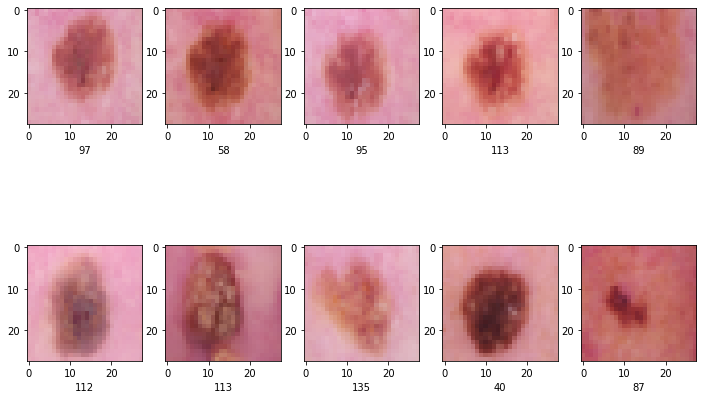

In [4]:
plt.figure(figsize=(12,8))
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(np.array(df)[i+1000][:-1].reshape(28,28,3), interpolation='nearest')
    plt.xlabel(str(np.array(df)[i+1000][784]))

In [5]:
X_train,X_test,y_train,y_test = SplitData(df)

In [6]:
X_train = X_train.reshape(-1,3,28,28)
X_test  = X_test.reshape(-1,3,28,28)

In [10]:
cnn_model = nn.Sequential(
    nn.Conv2d(in_channels=3,out_channels=16,kernel_size=(3,3)),
    nn.ReLU(),
    nn.Conv2d(in_channels=16,out_channels=32,kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Conv2d(in_channels=32,out_channels=32,kernel_size=(3,3)),
    nn.ReLU(),
    nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Flatten(1),
    nn.Linear(1024,64),
    nn.ReLU(),
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,7)



)
optimizer = torch.optim.Adam(cnn_model.parameters(),lr=1e-3)
criterion = torch.nn.CrossEntropyLoss()


In [11]:
FitModel(X_train,X_test,y_train,y_test,model=cnn_model,criterion=criterion,optimizer=optimizer,epoch=20,batch_size=64)

EPOCH     0 | LOSS: 982.2423 | TRAIN ACC: 40.05% | VAL ACC: 39.73% |
EPOCH     1 | LOSS: 823.4798 | TRAIN ACC: 52.27% | VAL ACC: 52.39% |
EPOCH     2 | LOSS: 642.5831 | TRAIN ACC: 66.14% | VAL ACC: 66.07% |
EPOCH     3 | LOSS: 519.7789 | TRAIN ACC: 71.33% | VAL ACC: 70.48% |
EPOCH     4 | LOSS: 441.7382 | TRAIN ACC: 73.75% | VAL ACC: 72.73% |
EPOCH     5 | LOSS: 387.8095 | TRAIN ACC: 77.33% | VAL ACC: 76.00% |
EPOCH     6 | LOSS: 350.2019 | TRAIN ACC: 79.25% | VAL ACC: 78.23% |
EPOCH     7 | LOSS: 321.3134 | TRAIN ACC: 82.11% | VAL ACC: 80.64% |
EPOCH     8 | LOSS: 294.1649 | TRAIN ACC: 81.03% | VAL ACC: 79.48% |
EPOCH     9 | LOSS: 256.6871 | TRAIN ACC: 86.73% | VAL ACC: 85.10% |
EPOCH    10 | LOSS: 226.1970 | TRAIN ACC: 86.42% | VAL ACC: 84.98% |
EPOCH    11 | LOSS: 216.9286 | TRAIN ACC: 87.83% | VAL ACC: 86.13% |
EPOCH    12 | LOSS: 195.9653 | TRAIN ACC: 88.83% | VAL ACC: 87.38% |
EPOCH    13 | LOSS: 174.9210 | TRAIN ACC: 90.43% | VAL ACC: 88.85% |
EPOCH    14 | LOSS: 173.1528 | TRA